In [1]:
import os
import numpy as np
import pandas as pd

Note For this to work, you will need the `lsst.sims` stack to be installed. 
 - opsimsummary uses `healpy` which is installed with the sims stack, but also available from pip/conda
 - snsims uses the `lsst.sims` stack.

In [13]:
import opsimsummary as oss
from opsimsummary import Tiling, HealpixTiles
# import snsims
import healpy as hp

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

## This section pertains to how to write a new Tiling class

```
noTile = snsims.Tiling()
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-9-5f6f8a94508e> in <module>()
----> 1 noTile = snsims.Tiling()

TypeError: Can't instantiate abstract class Tiling with abstract methods __init__, area, pointingSequenceForTile, tileIDSequence, tileIDsForSN
```

The class `snsims.Tiling` is an abstract Base class. Therefore, this cannot be instantiated. It must be subclassed, and the set of methods outlined have to be implemented for this to work.

In [8]:
class NoTile(Tiling):
    pass

In [9]:
noTile = NoTile()

TypeError: Can't instantiate abstract class NoTile with abstract methods __init__, area, pointingSequenceForTile, positions, tileIDSequence, tileIDsForSN


```
"""noTile = NoTile()
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-4-8ddedac7fb97> in <module>()
----> 1 noTile = NoTile()

TypeError: Can't instantiate abstract class NoTile with abstract methods __init__, area, pointingSequenceForTile, positions, tileIDSequence, tileIDsForSN
"""
```

The above fails because the methods are not implemented. Below is a stupid (ie. not useful) but minimalist class that would work:

In [10]:
class MyTile(Tiling):
    def __init__(self):
        pass
    @property
    def tileIDSequence(self):
        return np.arange(100)
    
    def tileIDsForSN(self, ra, dec):
        x = ra + dec
        y = np.remainder(x, 100.)
        return np.floor(y)
    def area(self, tileID):
        return 1.
    def pointingSequenceForTile(self, tileID, pointings):
        return None
    def positions(self):
        pass
    

In [11]:
myTile = MyTile()

## Using the class HealpixTiles

Currently there is only concrete tiling class that has been implemented. This is the `snsims.HealpixTiles` class.

This shows how to use the HealpixTiles Class

In [14]:
issubclass(HealpixTiles, Tiling)

True

In [16]:
help(HealpixTiles)

Help on class HealpixTiles in module opsimsummary.healpixTiles:

class HealpixTiles(opsimsummary.tessellations.Tiling)
 |  A concrete Tiling class based on Healpix Tiles. The user is
 |  allowed to choose the following parameters:
 |  
 |  Attributes
 |  ----------
 |  nside : int, power of 2, defaults to 256
 |      healpix nside parameter
 |  
 |  Method resolution order:
 |      HealpixTiles
 |      opsimsummary.tessellations.Tiling
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, nside=256, healpixelizedOpSim=None, preComputedMap=None)
 |      nside : int, power of 2, defaults to 256
 |          nside parameter of healpix. determines the size of the tiles
 |          so that there are 12 * nside **2 equally sized tiles covering
 |          the sphere.
 |  
 |  area(self, tileID)
 |  
 |  pointingSequenceForTile(self, tileID, allPointings=None, columns=None, **kwargs)
 |      return a maximal sequence of pointings for a particular tileID.
 |  
 |  po

In [17]:
datadir = os.path.join(oss.__path__[0], 'example_data')
opsimdb = os.path.join(datadir, 'enigma_1189_micro.db')

In [18]:
NSIDE = 4

In [19]:
hpOpSim = oss.HealPixelizedOpSim.fromOpSimDB(opsimdb, NSIDE=NSIDE)

 reading from database sqlite:////Users/rbiswas/.local/lib/python2.7/site-packages/opsimsummary/example_data/enigma_1189_micro.db
SELECT * FROM Summary WHERE PROPID in (366, 364)


In [20]:
NSIDE

4

In [22]:
hpTileshpOpSim = HealpixTiles(healpixelizedOpSim=hpOpSim, nside=NSIDE)

In [23]:
hpTileshpOpSim.pointingSequenceForTile(1, allPointings=None)

array([], dtype=int64)

In [24]:
phi, theta = hpTileshpOpSim.positions(1, 10000)

In [25]:
mapvals = np.ones(hp.nside2npix(NSIDE)) * hp.UNSEEN

In [26]:
mapvals[1] = 100

In [27]:
hp.ang2pix(NSIDE, np.radians(theta), np.radians(phi), nest=True)

array([13, 13, 13, ..., 13, 15, 15])

In [28]:
theta_c, phi_c = hp.pix2ang(4, 1, nest=True)

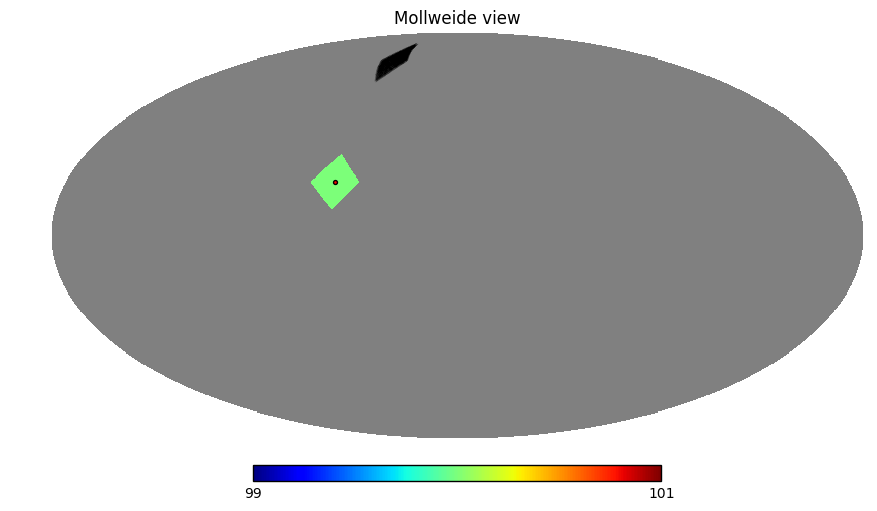

In [29]:
hp.mollview(mapvals, nest=True)
hp.projscatter(np.radians(theta), np.radians(phi), **dict(s=0.0002))
hp.projscatter(theta_c, phi_c, **dict(s=8., c='r'))

In [30]:
%timeit hpTileshpOpSim.pointingSequenceForTile(33, allPointings=None)

100 loops, best of 3: 2.52 ms per loop


In [31]:
preCompMap = os.path.join(oss.__path__[0], 'example_data', 'healpixels_micro.db')

In [33]:
hpTilesMap = HealpixTiles(nside=1, preComputedMap=preCompMap)

In [34]:
hpTilesMap.pointingSequenceForTile(10, allPointings=None)

array([171077, 171078, 171079, ..., 272594, 272626, 272656])

In [35]:
%timeit hpOpSim.obsHistIdsForTile(34)

100 loops, best of 3: 2.49 ms per loop


In [36]:
hpTiles = HealpixTiles(healpixelizedOpSim=hpOpSim)

In [37]:
hpTiles.pointingSequenceForTile(34, allPointings=None)

array([], dtype=int64)